# Unemployment Analysis in India

This notebook presents an analysis of unemployment data in India, covering data preprocessing, exploratory data analysis (EDA), hypothesis testing, and model building. The goal is to uncover trends, patterns, and potential predictive insights from the dataset.


Step 1: Understanding the Problem and Data
In this project, we're analyzing unemployment data in India. The dataset contains information such as:

Region: Different regions in India.
Date: The time when the unemployment data was recorded.
Frequency: The frequency of data recording (e.g., monthly).
Estimated Unemployment Rate (%): The percentage of the labor force that is unemployed.
Estimated Employed: The estimated number of employed individuals.
Estimated Labour Participation Rate (%): The percentage of the population that is either employed or actively looking for work.
Area: Whether the area is urban or rural.
Goal: Explore this data to identify trends and patterns, and possibly build models to predict future unemployment rates.

Action: Load the Data

In [1]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\saiha\OneDrive\Documents\DataAnalytics Project\Unemployment in India.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


Step 2: Data Cleaning and Preprocessing
Now that we have a better understanding of the dataset, we'll clean and preprocess the data to ensure it's ready for analysis.

1. Print and Clean Column Names

In [2]:
# Print column names to identify any issues
print("Original Column Names:")
print(df.columns)

# Remove any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Print column names to confirm the changes
print("\nCleaned Column Names:")
print(df.columns)


Original Column Names:
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

Cleaned Column Names:
Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


2. Convert 'Date' to Datetime Format

In [3]:
# Verify the presence of the 'Date' column
if 'Date' in df.columns:
    # Remove any leading or trailing spaces from the 'Date' column values
    df['Date'] = df['Date'].str.strip()

    # Convert 'Date' to datetime format
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

    # Display the data types to confirm the changes
    print("\nData types after conversion:")
    print(df.dtypes)

    # Display the first few rows of the dataframe
    df.head()
else:
    print("The 'Date' column was not found. Please check the dataset for any discrepancies.")



Data types after conversion:
Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
dtype: object


3. Check for Missing Values and Outliers

In [4]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Basic statistics to identify any outliers
print("\nSummary statistics:")
print(df.describe())


Missing values in each column:
Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

Summary statistics:
                                Date  Estimated Unemployment Rate (%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                        11.787946   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.657500   
50%              2019-11-30 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.887500   
max              2020-06-30 00:00:00                        76.740000   
std                          

4. Rename Columns (Optional)

In [5]:
# Rename columns for easier reference
df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate',
    'Region.1': 'Region_Category'
}, inplace=True)

# Display the first few rows after preprocessing
df.head()


,Region,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation_Rate,Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


Step 3: Exploratory Data Analysis (EDA)
After cleaning and preprocessing the data, the next step is to perform Exploratory Data Analysis (EDA). This step will help us understand the patterns, relationships, and key statistics in the data.

1. Univariate Analysis

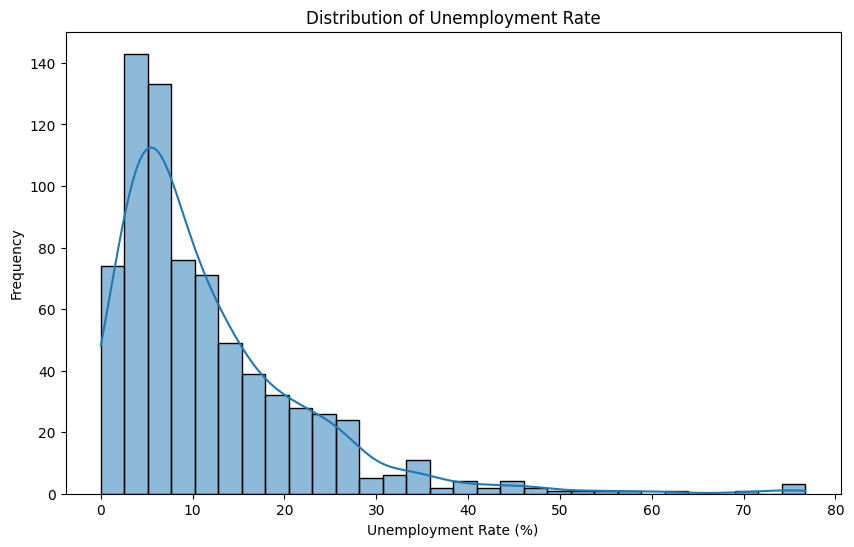

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Unemployment Rate
plt.figure(figsize=(10, 6))
sns.histplot(df['Unemployment_Rate'], bins=30, kde=True)
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()


2. Bivariate Analysis

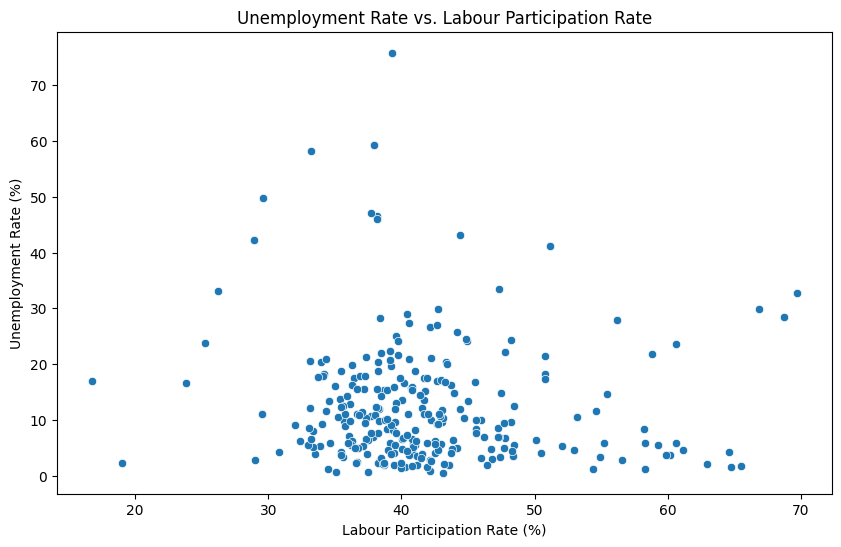

Correlation between Labour Participation Rate and Unemployment Rate: -0.07


In [7]:
# Unemployment Rate vs. Labour Participation Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Labour_Participation_Rate', y='Unemployment_Rate', data=df)
plt.title('Unemployment Rate vs. Labour Participation Rate')
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.show()

# Calculate and display the correlation between these variables
correlation = df['Labour_Participation_Rate'].corr(df['Unemployment_Rate'])
print(f"Correlation between Labour Participation Rate and Unemployment Rate: {correlation:.2f}")


3. Time Series Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


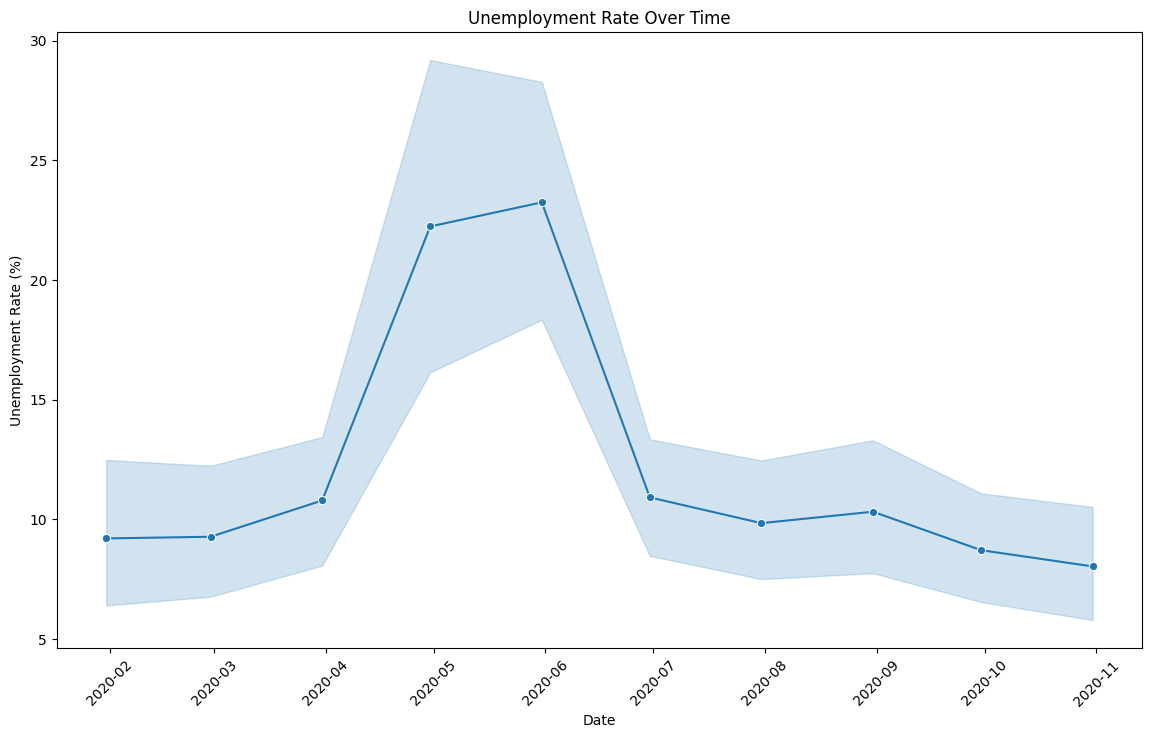

In [8]:
# Trend of Unemployment Rate Over Time
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Unemployment_Rate', data=df, marker='o')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()


4. Geographical Analysis

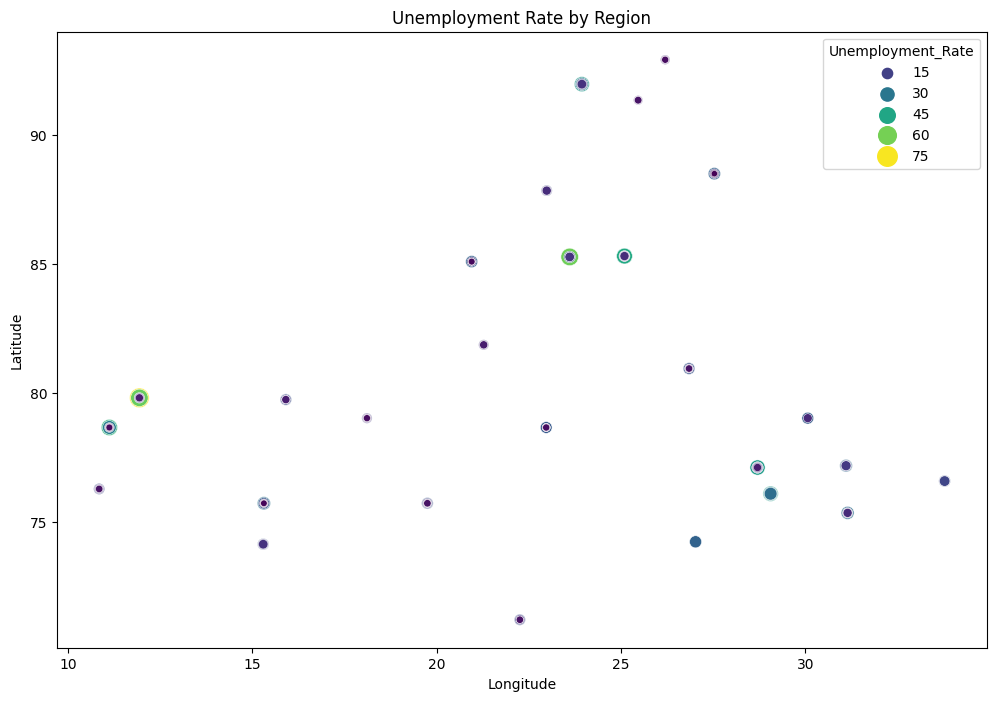

In [9]:
# Unemployment Rate by Region
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='Unemployment_Rate', size='Unemployment_Rate', data=df, palette='viridis', sizes=(20, 200))
plt.title('Unemployment Rate by Region')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Step 4: Hypothesis Testing
Once we have explored the data through EDA, we can move on to hypothesis testing to validate any assumptions or insights derived from the data.

1. Formulate Hypotheses
Null Hypothesis (H0): There is no significant difference in the unemployment rate across different regions.
Alternative Hypothesis (H1): There is a significant difference in the unemployment rate across different regions.
2. Perform the Test

In [10]:
from scipy.stats import f_oneway

# Extracting data for ANOVA
regions = df['Region_Category'].unique()
anova_data = [df[df['Region_Category'] == region]['Unemployment_Rate'] for region in regions]

# Performing the ANOVA test
anova_result = f_oneway(*anova_data)
print(f"ANOVA test result: F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}")

# Interpretation
if anova_result.pvalue < 0.05:
    print("Result: Reject the null hypothesis. There is a significant difference in unemployment rates across regions.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in unemployment rates across regions.")


ANOVA test result: F-statistic = 5.04, p-value = 0.0006
Result: Reject the null hypothesis. There is a significant difference in unemployment rates across regions.


Step 5: Model Building (Revised)
Now that we have a good understanding of the data through our exploratory data analysis (EDA), it's time to build models that can help us predict future unemployment rates. We'll begin by setting up a baseline model and then refine our approach.

5.1 Splitting the Data
First, we need to split the data into training and testing sets. This will help us evaluate the performance of our model on unseen data.

In [11]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df[['Labour_Participation_Rate', 'Employed', 'longitude', 'latitude']]
y = df['Unemployment_Rate']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 186
Test set size: 81


5.2 Baseline Model: Linear Regression
We'll start with a simple Linear Regression model as a baseline. This will give us an initial understanding of the relationship between the variables.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 91.05
R-squared (R2): -0.03


5.3 Model Refinement: Feature Engineering
If the baseline model's performance is not satisfactory, we can refine it by engineering new features or trying different models. For instance, we could include interactions between features or try polynomial regression.

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Create a pipeline with polynomial features and linear regression
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

# Train the refined model
poly_model.fit(X_train, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_test)

# Evaluate the refined model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Model - Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"Polynomial Model - R-squared (R2): {r2_poly:.2f}")


Polynomial Model - Mean Squared Error (MSE): 79.48
Polynomial Model - R-squared (R2): 0.10


5.4 Model Selection
Depending on the results from the baseline and refined models, we can choose the best-performing model. If necessary, we might explore other algorithms such as Decision Trees, Random Forests, or Gradient Boosting Machines.

5.5 Model Evaluation
Finally, we will assess the selected model on the test set using metrics such as MSE and R-squared. If the model is satisfactory, we can move forward with deploying it or using it for predictive analysis.

In [14]:
# Final model evaluation on the test set
final_model = model  # or poly_model, depending on performance

y_final_pred = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, y_final_pred)
final_r2 = r2_score(y_test, y_final_pred)

print(f"Final Model - Mean Squared Error (MSE): {final_mse:.2f}")
print(f"Final Model - R-squared (R2): {final_r2:.2f}")


Final Model - Mean Squared Error (MSE): 91.05
Final Model - R-squared (R2): -0.03
